In [4]:
import geopandas as gpd

The next code cell loads a shapefile containing information about forests, wilderness areas, and other lands under the care of the Department of Environmental Conservation in the state of New York.

In [5]:
# Read in the data
full_data = gpd.read_file("../geodata/geospatial_db/DEC_lands/DEC_lands/DEC_lands.shp")

# View the first five rows of the data
full_data.head()

,OBJECTID,CATEGORY,UNIT,FACILITY,CLASS,UMP,DESCRIPTIO,REGION,COUNTY,URL,SOURCE,UPDATE_,OFFICE,ACRES,LANDS_UID,GREENCERT,SHAPE_AREA,SHAPE_LEN,geometry
0,1,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,738.620192,103,N,2.990365e+06,7927.662385,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,2,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,282.553140,1218,N,1.143940e+06,4776.375600,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,3,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,234.291262,1780,N,9.485476e+05,5783.070364,"POLYGON ((486000.287 4635834.453, 485007.55 46..."
3,4,FOR PRES DET PAR,CFP,GREENE COUNTY FP DETACHED PARCEL,WILD FOREST,None,None,4,GREENE,http://www.dec.ny.gov/,GREENE RPP,5/12,STAMFORD,450.106464,2060,N,1.822293e+06,7021.644833,"POLYGON ((541716.775 4675243.268, 541217.58 46..."
4,6,FOREST PRESERVE,AFP,SARANAC LAKES WILD FOREST,WILD FOREST,SARANAC LAKES,None,5,ESSEX,http://www.dec.ny.gov/lands/22593.html,"DECRP, ESSEX RPP",12/96,RAY BROOK,69.702387,1517,N,2.821959e+05,2663.909932,"POLYGON ((583896.043 4909643.187, 583891.2 490..."


In [6]:
type(full_data)

geopandas.geodataframe.GeoDataFrame

In [7]:
data = full_data.loc[:, ["CLASS", "COUNTY", "geometry"]].copy()
# How many lands of each type are there?
data.CLASS.value_counts()

CLASS
WILD FOREST                   965
INTENSIVE USE                 108
PRIMITIVE                      60
WILDERNESS                     52
ADMINISTRATIVE                 17
UNCLASSIFIED                    7
HISTORIC                        5
PRIMITIVE BICYCLE CORRIDOR      4
CANOE AREA                      1
Name: count, dtype: int64

In [8]:
# Select lands that fall under the "WILD FOREST" or "WILDERNESS" category
wild_lands = data.loc[data.CLASS.isin(['WILD FOREST', 'WILDERNESS'])].copy()
wild_lands.head()

,CLASS,COUNTY,geometry
0,WILD FOREST,DELAWARE,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,WILD FOREST,DELAWARE,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,WILD FOREST,DELAWARE,"POLYGON ((486000.287 4635834.453, 485007.55 46..."
3,WILD FOREST,GREENE,"POLYGON ((541716.775 4675243.268, 541217.58 46..."
4,WILD FOREST,ESSEX,"POLYGON ((583896.043 4909643.187, 583891.2 490..."


<Axes: >

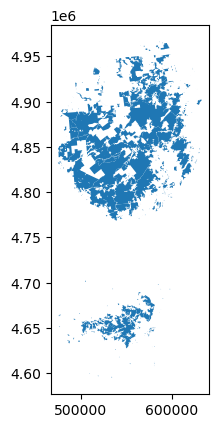

In [9]:
wild_lands.plot()

Every GeoDataFrame contains a special "geometry" column. It contains all of the geometric objects that are displayed when we call the plot() method.

In [10]:
# View the first five entries in the "geometry" column
wild_lands.geometry.head()

0    POLYGON ((486093.245 4635308.586, 486787.235 4...
1    POLYGON ((491931.514 4637416.256, 491305.424 4...
2    POLYGON ((486000.287 4635834.453, 485007.55 46...
3    POLYGON ((541716.775 4675243.268, 541217.58 46...
4    POLYGON ((583896.043 4909643.187, 583891.2 490...
Name: geometry, dtype: geometry

create three more GeoDataFrames, containing campsite locations (Point), foot trails (LineString), and county boundaries (Polygon).

In [12]:
# Campsites in New York state (Point)
POI_data = gpd.read_file("../geodata/geospatial_db/DEC_pointsinterest/DEC_pointsinterest/Decptsofinterest.shp")
campsites = POI_data.loc[POI_data.ASSET=='PRIMITIVE CAMPSITE'].copy()

# Foot trails in New York state (LineString)
roads_trails = gpd.read_file("../geodata/geospatial_db/DEC_roadstrails/DEC_roadstrails/Decroadstrails.shp")
trails = roads_trails.loc[roads_trails.ASSET=='FOOT TRAIL'].copy()

# County boundaries in New York state (Polygon)
counties = gpd.read_file("../geodata/geospatial_db/NY_county_boundaries/NY_county_boundaries/NY_county_boundaries.shp")

Next, create a map from all four GeoDataFrames.

The plot() method takes as (optional) input several parameters that can be used to customize the appearance. Most importantly, setting a value for ax ensures that all of the information is plotted on the same map.

<Axes: >

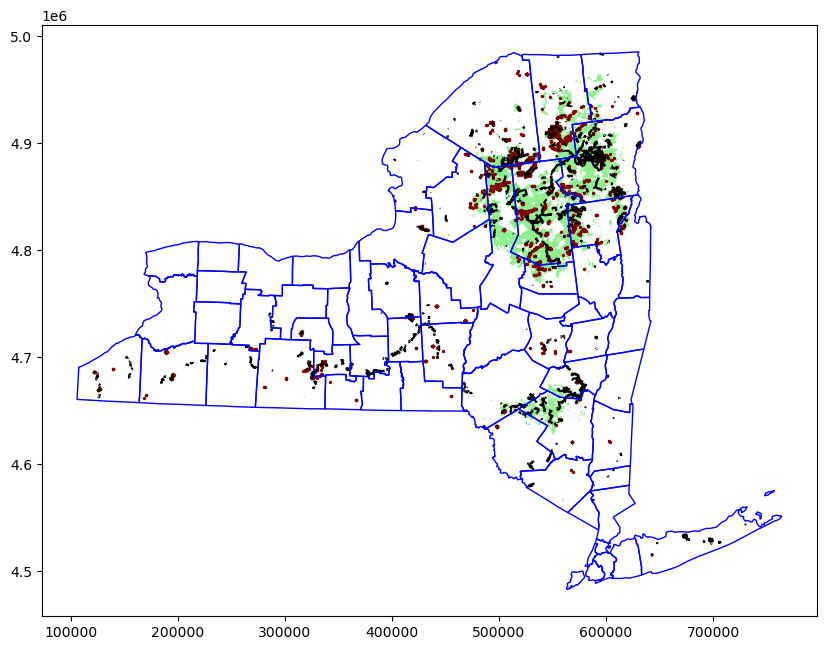

In [ ]:
# Define a base map with county boundaries
ax = counties.plot(figsize=(10,10), color='none', edgecolor='blue', zorder=3)

# Add wild lands, campsites, and foot trails to the base map
wild_lands.plot(color='green', ax=ax)
campsites.plot(color='maroon', markersize=2, ax=ax)
trails.plot(color='black', markersize=1, ax=ax)

C:\Users\Mehrima\AppData\Local\Temp\ipykernel_10104\178690168.py:21: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  handles, labels = ax.get_legend_handles_labels()


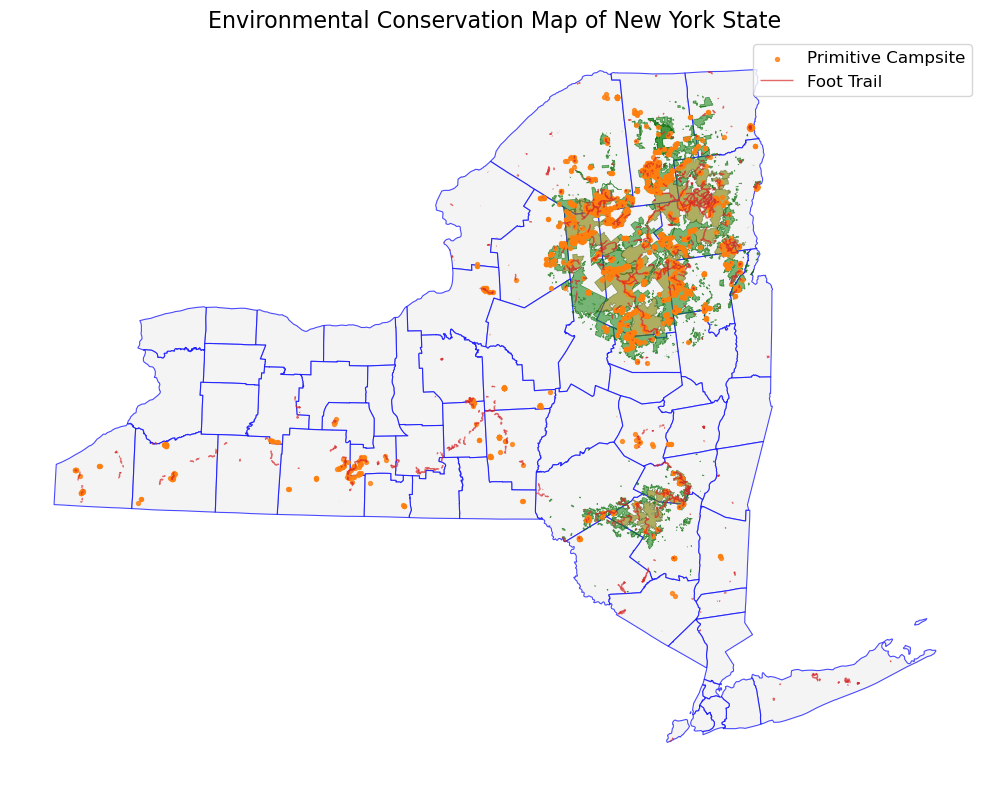

In [20]:
# Create a more colorful and meaningful environmental conservation map

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

# Plot county boundaries with light gray fill and blue edges
counties.plot(ax=ax, color='#f0f0f0', edgecolor='blue', linewidth=0.8, zorder=1, alpha=0.7)

# Plot wild lands: green for 'WILD FOREST', olive for 'WILDERNESS'
wild_lands[wild_lands.CLASS == 'WILD FOREST'].plot(ax=ax, color='#228B22', edgecolor='darkgreen', linewidth=0.5, label='Wild Forest', zorder=2, alpha=0.6)
wild_lands[wild_lands.CLASS == 'WILDERNESS'].plot(ax=ax, color='#808000', edgecolor='darkolivegreen', linewidth=0.5, label='Wilderness', zorder=2, alpha=0.6)

# Plot campsites as orange dots
campsites.plot(ax=ax, color='#ff7f0e', markersize=8, label='Primitive Campsite', zorder=3, alpha=0.8)

# Plot foot trails as red lines
trails.plot(ax=ax, color='#d62728', linewidth=1, label='Foot Trail', zorder=4, alpha=0.7)

# Add legend and title
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper right', fontsize=12, frameon=True)

ax.set_title('Environmental Conservation Map of New York State', fontsize=16)
ax.set_axis_off()
plt.tight_layout()
plt.show()

C:\Users\Mehrima\AppData\Local\Temp\ipykernel_10104\2488172291.py:19: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  handles, labels = ax.get_legend_handles_labels()


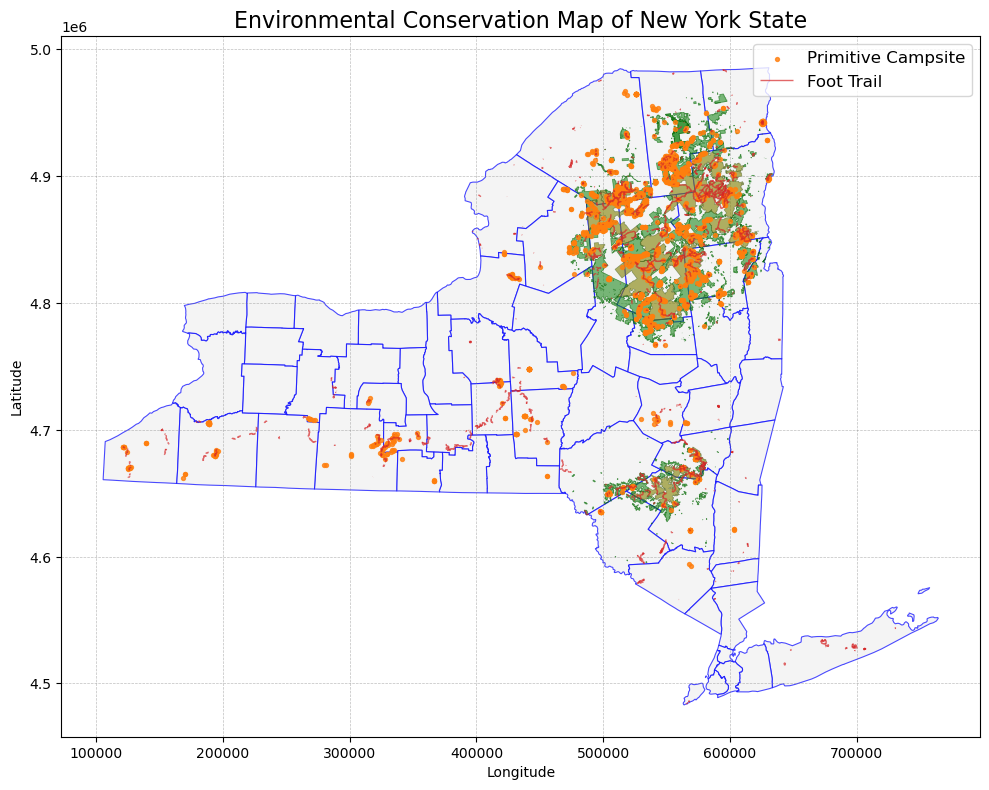

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

# Plot county boundaries with light gray fill and blue edges
counties.plot(ax=ax, color='#f0f0f0', edgecolor='blue', linewidth=0.8, zorder=1, alpha=0.7)

# Plot wild lands
wild_lands[wild_lands.CLASS == 'WILD FOREST'].plot(ax=ax, color='#228B22', edgecolor='darkgreen', linewidth=0.5, label='Wild Forest', zorder=2, alpha=0.6)
wild_lands[wild_lands.CLASS == 'WILDERNESS'].plot(ax=ax, color='#808000', edgecolor='darkolivegreen', linewidth=0.5, label='Wilderness', zorder=2, alpha=0.6)

# Campsites
campsites.plot(ax=ax, color='#ff7f0e', markersize=8, label='Primitive Campsite', zorder=3, alpha=0.8)

# Trails
trails.plot(ax=ax, color='#d62728', linewidth=1, label='Foot Trail', zorder=4, alpha=0.7)

# Legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper right', fontsize=12, frameon=True)

# Title
ax.set_title('Environmental Conservation Map of New York State', fontsize=16)

# ✅ Turn axis ON and add gridlines
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

# Optional: set limits or ticks if needed
# ax.set_xlim([xmin, xmax])
# ax.set_ylim([ymin, ymax])

plt.tight_layout()
plt.show()
